## Importing the required libraries & the dataset also

In [15]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers.experimental import SGD
from tensorflow.keras.utils import to_categorical

## Loading the dataset

In [2]:
(X_train,y_train) , (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


## Dimension of the train & test data

In [3]:
print('X train : ',X_train.shape)
print('X test : ',X_test.shape)
print('Y train :',y_train.shape)
print('Y test : ',y_test.shape)

X train :  (50000, 32, 32, 3)
X test :  (10000, 32, 32, 3)
Y train : (50000, 1)
Y test :  (10000, 1)


## Each of the train & test data contain 10 classes

In [4]:
y_cat_train  = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

## Feed Forward neural network layerwise

In [5]:
model_FFNN = Sequential()
## Input layer
model_FFNN.add(Input(shape=(32,32,3)))
model_FFNN.add(Flatten())
## Hidden layer details
model_FFNN.add(Dense(1024, activation="relu"))
model_FFNN.add(Dense(512, activation = "relu"))
model_FFNN.add(Dense(256, activation = "relu"))
model_FFNN.add(Dense(128, activation = "relu"))
model_FFNN.add(Dense(64, activation = "relu"))
model_FFNN.add(Dense(32, activation = "relu"))
## Output layer details
model_FFNN.add(Dense(10, activation = "softmax"))

print(model_FFNN.summary())
## 
opt = SGD(learning_rate = 0.000001, momentum=0.9)
model_FFNN.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2

In [6]:
model_FFNN.fit(X_train, y_cat_train, validation_data = (X_test, y_cat_test), epochs = 50, batch_size = 128)

Epoch 1/50
391/391 [==============================] - 6s 6ms/step - loss: 6.5322 - accuracy: 0.1133 - val_loss: 2.5355 - val_accuracy: 0.1121
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 2.4500 - accuracy: 0.1109 - val_loss: 2.3966 - val_accuracy: 0.1054
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 2.3731 - accuracy: 0.1079 - val_loss: 2.3597 - val_accuracy: 0.1040
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 2.3479 - accuracy: 0.1064 - val_loss: 2.3447 - val_accuracy: 0.1030
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 2.3356 - accuracy: 0.1057 - val_loss: 2.3358 - val_accuracy: 0.1016
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 2.3279 - accuracy: 0.1048 - val_loss: 2.3302 - val_accuracy: 0.1023
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 2.3228 - accuracy: 0.1043 - val_loss: 2.3266 - val_accuracy: 0.1024
Epoch 

In [7]:
metrics_FFNN = pd.DataFrame(model_FFNN.history.history)
metrics_FFNN

,loss,accuracy,val_loss,val_accuracy
0,6.532239,0.11330,2.535487,0.1121
1,2.450019,0.11094,2.396581,0.1054
2,2.373081,0.10790,2.359746,0.1040
3,2.347943,0.10644,2.344705,0.1030
4,2.335569,0.10568,2.335771,0.1016
5,2.327861,0.10480,2.330216,0.1023
6,2.322760,0.10426,2.326642,0.1024
7,2.319282,0.10416,2.324337,0.1024
8,2.316667,0.10390,2.322378,0.1022
9,2.314572,0.10354,2.320843,0.1017


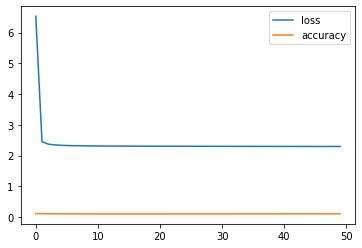

In [8]:
metrics_FFNN[["loss", "accuracy"]].plot()

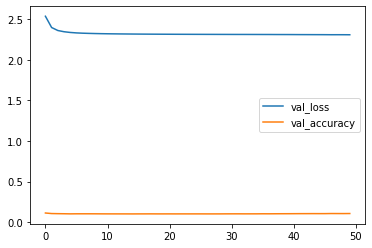

In [9]:
metrics_FFNN[["val_loss", "val_accuracy"]].plot()

## Implementation of Recurrent Nueral Network (RNN) for CIFAR10 datset

In [10]:
model = Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Flatten())
model.add(Reshape((1, 3072)))
model.add(SimpleRNN(1024, activation="relu"))
model.add(Reshape((1, 1024)))
model.add(SimpleRNN(1024, activation = "relu"))
model.add(Reshape((1, 1024)))
model.add(SimpleRNN(1024, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

print(model.summary())
## 
opt = SGD(learning_rate = 0.000001, momentum=0.9)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 reshape (Reshape)           (None, 1, 3072)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 1024)              4195328   
                                                                 
 reshape_1 (Reshape)         (None, 1, 1024)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 1024)              2098176   
                                                                 
 reshape_2 (Reshape)         (None, 1, 1024)           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1024)             

In [11]:
model.fit(X_train, y_cat_train, validation_data = (X_test, y_cat_test), epochs = 50, batch_size = 128)

Epoch 1/50
391/391 [==============================] - 6s 11ms/step - loss: 20.3938 - accuracy: 0.2211 - val_loss: 13.1852 - val_accuracy: 0.2512
Epoch 2/50
391/391 [==============================] - 4s 10ms/step - loss: 11.7402 - accuracy: 0.2709 - val_loss: 10.4716 - val_accuracy: 0.2833
Epoch 3/50
391/391 [==============================] - 4s 10ms/step - loss: 9.7873 - accuracy: 0.2895 - val_loss: 9.2023 - val_accuracy: 0.2891
Epoch 4/50
391/391 [==============================] - 4s 10ms/step - loss: 8.5399 - accuracy: 0.3007 - val_loss: 8.2649 - val_accuracy: 0.3020
Epoch 5/50
391/391 [==============================] - 4s 10ms/step - loss: 7.6817 - accuracy: 0.3080 - val_loss: 7.6888 - val_accuracy: 0.3089
Epoch 6/50
391/391 [==============================] - 4s 10ms/step - loss: 7.0534 - accuracy: 0.3140 - val_loss: 7.1573 - val_accuracy: 0.3119
Epoch 7/50
391/391 [==============================] - 4s 10ms/step - loss: 6.5126 - accuracy: 0.3213 - val_loss: 6.6656 - val_accuracy: 0.

In [12]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,20.393789,0.22112,13.185229,0.2512
1,11.740241,0.27090,10.471552,0.2833
2,9.787300,0.28948,9.202296,0.2891
3,8.539875,0.30074,8.264922,0.3020
4,7.681741,0.30798,7.688803,0.3089
5,7.053371,0.31398,7.157305,0.3119
6,6.512568,0.32132,6.665555,0.3181
7,6.097308,0.32532,6.304853,0.3155
8,5.752655,0.32976,6.003984,0.3247
9,5.450137,0.33250,5.709724,0.3210


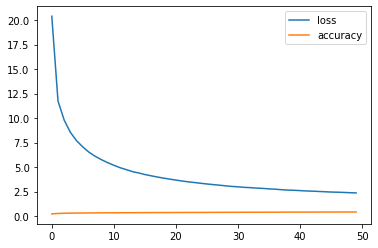

In [13]:
metrics[["loss", "accuracy"]].plot()

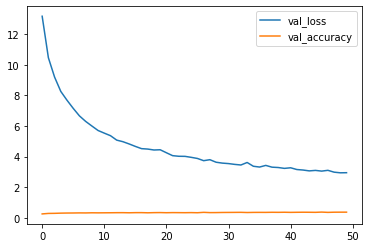

In [14]:
metrics[["val_loss", "val_accuracy"]].plot()